## Observations and Insights 

observation 1: Capomulin and Ramicane had the smallest tumor volumn
observation 2: Male vs Female mice used in the test was basically equal
observation 3: Tumor volumn increases with increased weight of the mouse

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import itertools

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
#mouse_metadata.count()
study_results['Mouse ID'].nunique()

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = duplicate_results['Mouse ID'].unique()
duplicate_id


array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study_results.drop(study_results[study_results['Mouse ID'] == "g989"].index, inplace=True)
study_results = study_results[~study_results['Mouse ID'].isin(duplicate_id)]
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
study_results['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


count = study_results.groupby(["Drug Regimen"]).count()['Tumor Volume (mm3)']
tumor_mean = study_results.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
tumor_median = study_results.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
tumor_var = study_results.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
tumor_std_dev = study_results.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
tumor_sem = study_results.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']

##following returns 
tumor_results = pd.DataFrame({"Count" : count,
                              "Mean": tumor_mean,
                              "Median" : tumor_median,
                              "Variance" : tumor_var,
                              "Standard Deviation" : tumor_std_dev,
                              "SEM" : tumor_sem})

tumor_results


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
results_regimen_agg = study_results.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['count','mean','median','var', 'std','sem']})

results_regimen_agg

Tumor Volume (mm3)                                             \
                          count       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    148  52.320930  50.446266  43.852013  6.622085   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

In [9]:
results_regimen = study_results.groupby(["Drug Regimen"]).describe()
results_regimen

#use the following to display a single column
#results_regimen["Timepoint"][["max"]]

Timepoint                                                      \
                 count       mean        std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0   
Propriva         148.0  17.060811  13.676648  0.0   5.0  15.0  26.25  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0   

             Tumor Volume (mm3)             ... Age_months       Weight (g)  \
                          count       mean  ...        75%   max      count   
Drug Regimen                                ...                               
Capomulin                 230.0  40.675741  ...       20.0  24.0      230.0   
Ceftamin                  178.0  52.591172  ...       20.0  24.0      178.0   
Infubinol                 178.0  52.884795  ...       23.0  24.0      178.0   
Ketapril                  188.0  55.235638  ...       19.0  24.0      188.0   
Naftisol                  186.0  54.331565  ...       19.0  23.0      186.0   
Placebo                   181.0  54.033581  ...       17.0  21.0      181.0   
Propriva                  148.0  52.320930  ...       16.0  24.0      148.0   
Ramicane                  228.0  40.216745  ...       18.0  23.0      228.0   
Stelasyn                  181.0  54.233149  ...       21.0  23.0      181.0   
Zoniferol                 182.0  53.236507  ...       16.0  24.0      182.0   

                                                                 
                   mean       std   min   25%   50%   75%   max  
Drug Regimen                                                     
Capomulin     19.965217  2.732404  15.0  17.0  20.5  22.0  25.0  
Ceftamin      27.398876  1.581460  25.0  26.0  28.0  28.0  30.0  
Infubinol     27.196629  2.183810  23.0  25.0  27.0  29.0  30.0  
Ketapril      27.861702  1.841884  25.0  26.0  28.0  30.0  30.0  
Naftisol      27.166667  1.499249  25.0  26.0  27.0  28.0  30.0  
Placebo       27.928177  1.837973  25.0  27.0  28.0  30.0  30.0  
Propriva      27.135135  1.712891  25.0  26.0  26.0  29.0  30.0  
Ramicane      19.679825  3.235014  16.0  17.0  19.0  22.0  25.0  
Stelasyn      27.856354  1.643616  25.0  27.0  28.0  29.0  30.0  
Zoniferol     27.692308  1.419612  25.0  27.0  28.0  29.0  30.0  

[10 rows x 40 columns]

## Bar and Pie Charts

In [10]:
tumor_results

,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


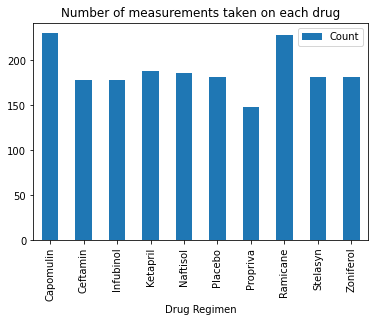

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

tumor_results.plot.bar(y = "Count", title = "Number of measurements taken on each drug")



In [12]:
reset_tumor_results = tumor_results.reset_index()
reset_tumor_results

,Drug Regimen,Count,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


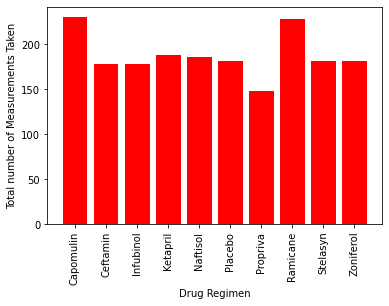

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_name = reset_tumor_results["Drug Regimen"]
count = reset_tumor_results["Count"]


plt.bar(drug_name, count, color='r', alpha=1, align="center")

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Measurements Taken")
plt.show()

In [14]:
m_f_count = study_results.groupby(["Sex"]).count()['Tumor Volume (mm3)']

m_f_results = pd.DataFrame({"Count" : m_f_count})
m_f_results

m_f_count = m_f_results["Count"]
m_f_count


Sex
Female    922
Male      958
Name: Count, dtype: int64

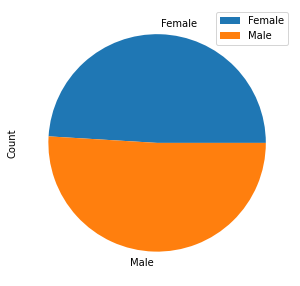

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

m_f_results.plot.pie(y="Count", figsize=(5, 5))

In [16]:
##labels = m_f_count.loc['Sex']
labels = ["Female", "Male"]
colors = ["red","blue"]

([<matplotlib.patches.Wedge at 0x1df3d8a64a8>,
 [Text(-1.088543143053058, -0.15834716831118148, 'Female'),
  Text(1.0885431430530583, 0.1583471683111804, 'Male')],
 [Text(-0.593750805301668, -0.0863711827151899, '49.0%'),
  Text(0.5937508053016681, 0.0863711827151893, '51.0%')])

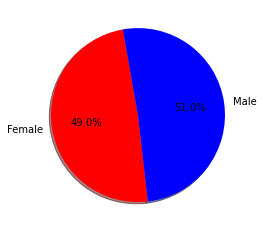

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(m_f_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)


## Quartiles, Outliers and Boxplots

In [18]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Calculate the final tumor 
# of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#  get only the records with the desired drug regimen 
four_reg_results = study_results.loc[study_results["Drug Regimen"].isin(four_reg)]
four_reg_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [20]:
results = four_reg_results.groupby(["Mouse ID"]).max()["Timepoint"]

max_time_df = pd.DataFrame({"Timepoint" : results})

max_time_df.reset_index()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [21]:
# Merge the df with the original dataframe to get the tumor volume at the last timepoint
#use a left merge to keep only the rows that have the max time
four_results = pd.merge(max_time_df, four_reg_results, how = "left", left_on = ["Mouse ID", "Timepoint"], right_on = ["Mouse ID", "Timepoint"])
four_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = four_results["Drug Regimen"].unique()
drugs = four_results["Drug Regimen"].to_list()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = four_results["Tumor Volume (mm3)"].to_list()




In [23]:
four_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,35.700000,47.197795,1.45000,13.520000,23.710000
std,14.442852,12.953884,1.14922,7.608448,4.472802
min,0.000000,22.050126,0.00000,1.000000,15.000000
25%,30.000000,37.187744,1.00000,7.000000,20.000000
50%,45.000000,45.000000,1.00000,15.000000,25.000000
75%,45.000000,59.930262,2.00000,20.000000,27.250000
max,45.000000,72.226731,4.00000,24.000000,30.000000


In [24]:
#treatments 

vol_list = []
for drug in treatments:
    tumor_vol = four_results.loc[four_results["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    #create quartile to find outliers
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]

    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print(lower_bound, upper_bound)
    
    
    vol_list.append(tumor_vol)
      
    #check if the record is an outlier and print      
    outliers = [x for x in tumor_vol if x < lower_bound or x > upper_bound]
    print(f'outlier {outliers}')




36.83290494999999 82.74144559000001
outlier [36.321345799999996]
25.355449580000002 87.66645829999999
outlier []
17.912664470000003 54.30681135
outlier []
20.70456164999999 51.83201549
outlier []


{'whiskers': [<matplotlib.lines.Line2D at 0x1df3d913048>,
 'caps': [<matplotlib.lines.Line2D at 0x1df3d913748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df3d902cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x1df3d913e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1df3d91c208>,
 'means': []}

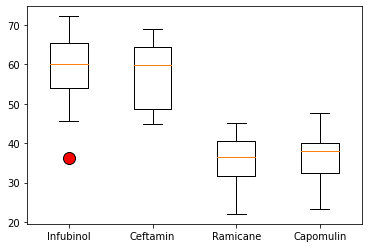

In [25]:
#box plot
    
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)    
plt.boxplot(vol_list, labels = treatments, flierprops = flierprops)


## Line and Scatter Plots

In [26]:
four_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


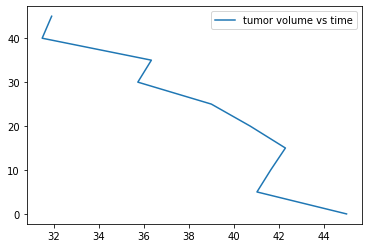

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = "y793"
cap_tumor_vol = study_results.loc[study_results["Mouse ID"] == capomulin_mouse, "Tumor Volume (mm3)"]
cap_tumor_time =  study_results.loc[study_results["Mouse ID"] == capomulin_mouse, "Timepoint"]

#print(cap_tumor_vol,cap_tumor_time)

plt.plot(cap_tumor_vol, cap_tumor_time)
plt.legend(["tumor volume vs time"])
plt.show()



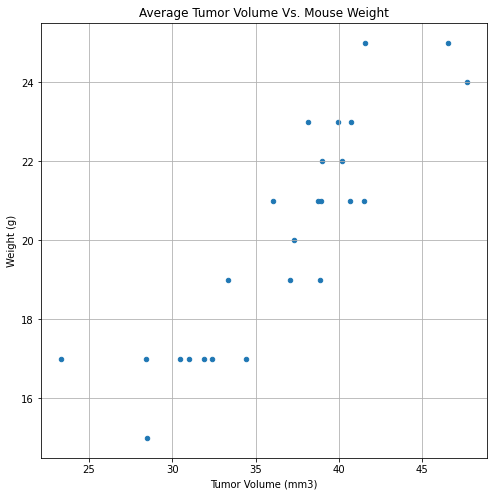

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_set = four_results.loc[four_results["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]


capomulin_set.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8),
                         title="Average Tumor Volume Vs. Mouse Weight")


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_volume = capomulin_set["Tumor Volume (mm3)"].to_list()
weight = capomulin_set["Weight (g)"].to_list()

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,tumor_volume)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.88


In [30]:
cap_slope, cap_intercept, cap_r, cap_p, cap_std_err = st.linregress(tumor_volume, weight)

print (f'linear regression: \n   slope = {cap_slope}\n   intercept = {cap_intercept}\n   rvalue = {cap_r}\n   pvalue = {cap_p}\n   std error = {cap_std_err}')
 

linear regression: 
   slope = 0.4390902208326348
   intercept = 4.0196295927808805
   rvalue = 0.8767060403658118
   pvalue = 9.084429088673265e-09
   std error = 0.050234822740736366


In [31]:
capomulin_set.head()

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
9,b128,38.982878,Capomulin,22
12,b742,38.939633,Capomulin,21
24,f966,30.485985,Capomulin,17
25,g288,37.074024,Capomulin,19
26,g316,40.159220,Capomulin,22


In [32]:
tumor = tumor_volume[0]

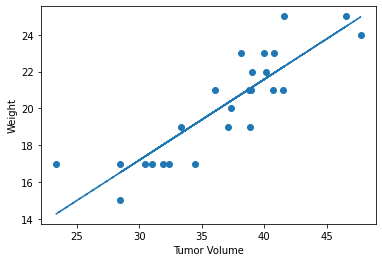

In [33]:
#create the scatter plot
tumor = capomulin_set.iloc[:,1]
wgt = capomulin_set.iloc[:,3]

plt.scatter(tumor, wgt)

#plot the linear model on top of scatter plot
fit = cap_slope * tumor + cap_intercept

plt.plot(tumor_volume, fit, "--")

#label
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()